#병원 개/폐업 분류 예측 경진대회 STAGE 1(데이터 셋 설명)

##stage1-1 코랩으로 데이터 불러오기.

데이터 셋 설명을 하기 앞서, 구글의 코랩을 통해 대회의 데이터를 불러오겠습니다.

- 만약 코랩이 처음이시라면 [코랩](https://ffoorreeuunn.tistory.com/244)을 참고해주세요.


In [36]:
import pandas as pd

In [37]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [38]:
!unzip -qq "/content/gdrive/MyDrive/9565_hospital_data.zip"

replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [55]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

###세부 설명



```
import pandas as pd
```
테이블 형식(표)으로 데이터를 불러오는 라이브러리인 판다스를 import, 즉 불러오는 코드 입니다.

그리고 as pd를 통해 전체 pandas 말고 pd만 처도 판다스가 호출이 되도록 코드를 작성했습니다.

- 만약 판다스에 대해 좀 더 알고 싶다면, [판다스](https://datascienceschool.net/01%20python/04.01%20%ED%8C%90%EB%8B%A4%EC%8A%A4%20%ED%8C%A8%ED%82%A4%EC%A7%80%EC%9D%98%20%EC%86%8C%EA%B0%9C.html)를 참고해주세요.




```
from google.colab import drive
drive.mount('/content/gdrive/')
```
구글 드라이브와 코랩을 연결해주는 코드입니다. 구글 드라이브에 저장된 데이터를 코랩에 불어오기 위해 사용했습니다.




```
!unzip -qq "/content/gdrive/MyDrive/9565_hospital_data.zip"
```



위 코드로 코랩과 드라이브를 연동했으면, zip파일을 풀어야 합니다. 

본래 코드는 

```
! unzip -qq "파일 경로"
```
입니다.

따라서 만일 이 코드를 쓰실때 각자 코랩의 파일 경로를 "파일 경로"에 집어 넣으시면 압축을 풀고 코랩에 데이터가 저장됩니다.


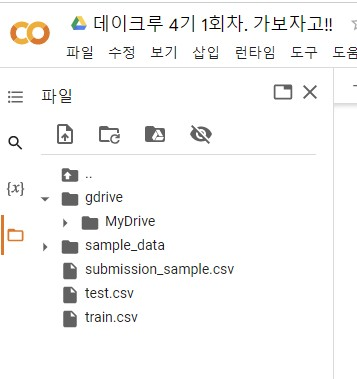

압축을 풀면 test.csv, train.csv, submission_sample.csv가 생성됩니다.



```
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

```
앞에서 설명한 pandas를 적용한 모습입니다.


```
train = pd.read_csv('경로')
test = pd.read_csv('경로')
```
로 사용하시면 됩니다.



- 코랩에서 파일경로를 못찾겠다면?


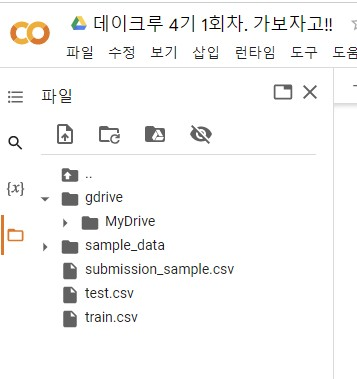


여기에서 해당하는 파일을 우클릭하시면 **경로 복사**가 있습니다. 복사하시고 '경로'에 붙어주시면 됩니다.

이때 꼭 " " 사이에 넣어야 합니다.

### 여기까지 진행상황.

In [56]:
train

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.000000e+00,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,5.154837e+08,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.000000e+00,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.000000e+00,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,422,open,jeonnam,178,20050211,214.0,nursing_hospital,7.614697e+09,4.153475e+08,5.903119e+09,...,9.423771e+09,2.618201e+09,0.000000e+00,6.805570e+09,5.930000e+09,5.379502e+09,8.116416e+08,193.0,141.0,same
297,423,close,choongnam,159,20140618,NaN,hospital,6.717144e+09,8.200000e+09,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,79.0,79.0,same
298,426,close,gyeongbuk,107,19830705,NaN,hospital,0.000000e+00,0.000000e+00,5.479428e+07,...,6.370097e+09,2.170973e+09,0.000000e+00,4.199124e+09,2.498749e+09,3.259161e+09,0.000000e+00,NaN,NaN,NaN
299,427,close,gyeonggi,169,20070101,180.0,nursing_hospital,2.116892e+09,2.681748e+08,3.286245e+09,...,6.392336e+08,6.400000e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,100.0,NaN,NaN


In [57]:
test

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,2,NaN,incheon,139,19981125.0,300.0,general_hospital,6.682486e+10,0.000000e+00,6.565709e+10,...,5.540643e+10,5.068443e+10,3.714334e+10,4.720000e+09,4.690000e+09,1.608540e+10,8.944587e+09,693,693,same
1,5,NaN,jeju,149,20160309.0,44.0,hospital,3.495758e+10,0.000000e+00,3.259270e+10,...,6.730838e+10,4.209828e+10,2.420000e+10,2.521009e+10,1.830000e+10,3.789135e+09,0.000000e+00,379,371,same
2,6,NaN,jeonnam,103,19890427.0,276.0,general_hospital,2.326031e+10,2.542571e+09,2.308749e+10,...,0.000000e+00,2.777589e+10,2.182278e+10,0.000000e+00,0.000000e+00,0.000000e+00,1.638540e+10,NaN,NaN,NaN
3,8,NaN,busan,71,20100226.0,363.0,general_hospital,0.000000e+00,0.000000e+00,0.000000e+00,...,1.211517e+10,9.556237e+09,4.251867e+09,2.558931e+09,0.000000e+00,3.914284e+10,0.000000e+00,760,760,same
4,10,NaN,jeonbuk,26,20040604.0,213.0,general_hospital,5.037025e+10,0.000000e+00,4.855803e+10,...,4.395973e+10,7.535567e+09,3.298427e+09,3.642417e+10,2.134712e+10,2.574488e+10,1.507269e+10,437,385,same
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,424,NaN,jeonnam,33,20011012.0,0.0,traditional_clinic,2.233031e+10,8.484657e+08,1.849255e+10,...,1.563217e+10,1.288180e+10,0.000000e+00,2.750371e+09,0.000000e+00,1.384958e+10,0.000000e+00,560,NaN,NaN
123,425,NaN,gyeonggi,74,20010530.0,NaN,traditional_hospital,1.833906e+10,0.000000e+00,1.760117e+10,...,3.176628e+09,1.376742e+09,0.000000e+00,1.799886e+09,1.740000e+09,8.574502e+09,7.136681e+09,132,137,same
124,429,NaN,gyeonggi,116,20010101.0,150.0,hospital,1.424266e+10,1.726174e+09,1.148722e+10,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
125,430,NaN,jeju,76,20010201.0,NaN,NaN,4.892710e+10,4.157148e+10,4.721485e+09,...,3.720397e+10,8.485918e+09,0.000000e+00,2.871805e+10,2.563120e+10,-2.050629e+08,0.000000e+00,363,343,same


이 두가지가 나와야 합니다.

## stage1-2 칼럼 정리


음... 칼럼을 보기가 어렵네요.. 좀 판다스를 사용해서 보기 쉽도록 정리해보겠습니다. 

- 혹시 **칼럼과 로우**에 대해 모르신다면 [칼럼](https://appia.tistory.com/665)을 참고해주세요.

In [58]:
train.columns

Index(['inst_id', 'OC', 'sido', 'sgg', 'openDate', 'bedCount', 'instkind',
       'revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1',
       'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1',
       'receivableS1', 'inventoryAsset1', 'nonCAsset1', 'tanAsset1',
       'OnonCAsset1', 'receivableL1', 'debt1', 'liquidLiabilities1',
       'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1',
       'revenue2', 'salescost2', 'sga2', 'salary2', 'noi2', 'noe2',
       'interest2', 'ctax2', 'profit2', 'liquidAsset2', 'quickAsset2',
       'receivableS2', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2',
       'OnonCAsset2', 'receivableL2', 'debt2', 'liquidLiabilities2',
       'shortLoan2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2',
       'employee1', 'employee2', 'ownerChange'],
      dtype='object')

In [59]:
test.columns

Index(['inst_id', 'OC', 'sido', 'sgg', 'openDate', 'bedCount', 'instkind',
       'revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1',
       'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1',
       'receivableS1', 'inventoryAsset1', 'nonCAsset1', 'tanAsset1',
       'OnonCAsset1', 'receivableL1', 'debt1', 'liquidLiabilities1',
       'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1',
       'revenue2', 'salescost2', 'sga2', 'salary2', 'noi2', 'noe2',
       'interest2', 'ctax2', 'profit2', 'liquidAsset2', 'quickAsset2',
       'receivableS2', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2',
       'OnonCAsset2', 'receivableL2', 'debt2', 'liquidLiabilities2',
       'shortLoan2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2',
       'employee1', 'employee2', 'ownerChange'],
      dtype='object')



```
train.columns

test.columns
```
각 칼럼을 따로 리스트 형태로 호출했습니다. 그럼 이제 좀 보기편하도록 판다스 테이블 형식으로 바꾸어 주겠습니다.


In [60]:
train_columns = pd.DataFrame({'columns':train.columns})

In [61]:
train_columns

,columns
0,inst_id
1,OC
2,sido
3,sgg
4,openDate
5,bedCount
6,instkind
7,revenue1
8,salescost1
9,sga1




```
train_columns = pd.DataFrame({'columns':train.columns})
```
train_columns라는 표를 만들었습니다.

pd.DataFrame은 앞에서 설명한 pandas의 기능중 테이블을 만드는 기능을 호출한 것이고, columns = columns, row = train의 칼럼으로 코드를 작성했습니다.

그럼 이제 test columns을 데이터 프레임 형식으로 만들어 보겠습니다.

In [62]:
test_columns = pd.DataFrame({'columns':test.columns})

In [63]:
test_columns

,columns
0,inst_id
1,OC
2,sido
3,sgg
4,openDate
5,bedCount
6,instkind
7,revenue1
8,salescost1
9,sga1


음.. 그래도 아직 잘 모르겠습니다. 컬럼에 대한 설명을 추가하면 좋을 거 같은데....

[칼럼 설명](https://dacon.io/competitions/official/9565/data)을 보면 데이콘에서 친절하게 컬럼을 하나하나 설명해주고 있습니다. 이걸로 위 데이터 프레임에 하나하나 추가해보면 더 가독성이 좋을 것 같습니다.

좀 많지만 앞으로 계속 쓸거라 한번 추가해보겠습니다.

In [64]:
train_columns = pd.DataFrame({'columns':train.columns,
                             'info':['각 파일에서의 병원 고유 번호',
                                      '영업/폐업 분류, 2018년 폐업은 2017년 폐업으로 간주함',
                                      '병원의 광역 지역 정보',
                                      '병원의 시군구 자료',
                                      '병원 설립일','병원이 갖추고 있는 병상의 수',
                                      '병원, 의원, 요양병원, 한의원, 종합병원 등 병원의 종류 종합병원 : 입원환자 100명 이상 수용 가능 병원 : 입원 환자 30명 이상 100명 미만 수용 가능 의원 : 입원 환자 30명 이하 수용 가능 한방 병원(한의원) : 침술과 한약으로 치료하는 의료 기관.',
                                      '매출액, 2017(회계년도)년 데이터를 의미함',
                                      '매출원가, 2017(회계년도)년 데이터를 의미함',
                                      '판매비와 관리비, 2017(회계년도)년 데이터를 의미함',
                                      '급여, 2017(회계년도)년 데이터를 의미함','영업외수익, 2017(회계년도)년 데이터를 의미함',
                                      '영업외비용, 2017(회계년도)년 데이터를 의미함','이자비용, 2017(회계년도)년 데이터를 의미함',
                                      '법인세비용, 2017(회계년도)년 데이터를 의미함','당기순이익, 2017(회계년도)년 데이터를 의미함',
                                      '유동자산, 2017(회계년도)년 데이터를 의미함','당좌자산, 2017(회계년도)년 데이터를 의미함',
                                      '미수금(단기), 2017(회계년도)년 데이터를 의미함','재고자산, 2017(회계년도)년 데이터를 의미함',
                                      '비유동자산, 2017(회계년도)년 데이터를 의미함','유형자산, 2017(회계년도)년 데이터를 의미함',
                                      '기타 비유동자산, 2017(회계년도)년 데이터를 의미함','장기미수금, 2017(회계년도)년 데이터를 의미함',
                                      '부채총계, 2017(회계년도)년 데이터를 의미함','유동부채, 2017(회계년도)년 데이터를 의미함',
                                      '단기차입금, 2017(회계년도)년 데이터를 의미함','비유동부채, 2017(회계년도)년 데이터를 의미함',
                                      '장기차입금, 2017(회계년도)년 데이터를 의미함','순자산총계, 2017(회계년도)년 데이터를 의미함','이익잉여금, 2017(회계년도)년 데이터를 의미함',
                                      '매출액, 2016(회계년도)년 데이터를 의미함','매출원가, 2016(회계년도)년 데이터를 의미함',
                                      '판매비와 관리비, 2016(회계년도)년 데이터를 의미함','급여, 2016(회계년도)년 데이터를 의미함',
                                      '영업외수익, 2016(회계년도)년 데이터를 의미함','영업외비용, 2016(회계년도)년 데이터를 의미함',
                                      '이자비용, 2016(회계년도)년 데이터를 의미함','법인세비용, 2016(회계년도)년 데이터를 의미함',
                                      '당기순이익, 2016(회계년도)년 데이터를 의미함','유동자산, 2016(회계년도)년 데이터를 의미함',
                                      '당좌자산, 2016(회계년도)년 데이터를 의미함','미수금(단기), 2016(회계년도)년 데이터를 의미함',
                                      '재고자산, 2016(회계년도)년 데이터를 의미함','비유동자산, 2016(회계년도)년 데이터를 의미함',
                                      '유형자산, 2016(회계년도)년 데이터를 의미함','기타 비유동자산, 2016(회계년도)년 데이터를 의미함',
                                      '장기미수금, 2016(회계년도)년 데이터를 의미함','부채총계, 2016(회계년도)년 데이터를 의미함',
                                      '유동부채, 2016(회계년도)년 데이터를 의미함','단기차입금, 2016(회계년도)년 데이터를 의미함',
                                      '비유동부채, 2016(회계년도)년 데이터를 의미함','장기차입금, 2016(회계년도)년 데이터를 의미함',
                                      '순자산총계, 2016(회계년도)년 데이터를 의미함','이익잉여금, 2016(회계년도)년 데이터를 의미함',
                                      '고용한 총 직원의 수, 2017(회계년도)년 데이터를 의미함','고용한 총 직원의 수, 2016(회계년도)년 데이터를 의미함',
                                      '대표자의 변동 여부']})

In [65]:
train_columns

,columns,info
0,inst_id,각 파일에서의 병원 고유 번호
1,OC,"영업/폐업 분류, 2018년 폐업은 2017년 폐업으로 간주함"
2,sido,병원의 광역 지역 정보
3,sgg,병원의 시군구 자료
4,openDate,병원 설립일
5,bedCount,병원이 갖추고 있는 병상의 수
6,instkind,"병원, 의원, 요양병원, 한의원, 종합병원 등 병원의 종류 종합병원 : 입원환자 1..."
7,revenue1,"매출액, 2017(회계년도)년 데이터를 의미함"
8,salescost1,"매출원가, 2017(회계년도)년 데이터를 의미함"
9,sga1,"판매비와 관리비, 2017(회계년도)년 데이터를 의미함"


각 칼럼에 대한 설명입니다.

##stage1-3 칼럼 세부 설명

근데 좀 생소한 글이 보입니다. 매출원가, 장기미수금등 좀 어려운 말이 보이네요.

좀 각 데이터에 대한 자세한 설명이 있으면 좋을 것 같습니다.

###매출원가

기업의 영업활동에서 영업수익을 올리는 데 필요한 비용.

###영업외수익
업의 주된 영업활동이 아닌 활동으로부터 발생한 수익과 차익

### 영업외비용
기업의 주된 영업활동에서 생기는 비용 이외의 비용.

### 당기순이익
기업의 당기순이익이란 것은 일정기간의 순이익을 의미한다. 순이익이란 매출액에서 매출원가, 판매비, 관리비 등을 빼고 여기에 영업외 수익과 비용, 특별 이익과 손실을 가감한 후 법인세를 뺀 것이다.

### 유동자산
짧은 기간 안에 현금으로 바꿀 수 있는 자산

### 당좌자산
현금이나 시간의 경과에 따라 현금화되는 자산으로서 환금성이 가장 높은 자산으로 지급자산(支給資産) ·신속자산(迅速資産) ·급동자산(急動資産)이라고도 한다. 기업의 현금동원능력이나 지불능력의 바로미터가 되는 것은 당좌자산이다.

### 미수금(단기)
일상적 판매대상인 상품 ·제품 이외의 자산을 매각하였을 경우 그 대금 중 미수된 금액

### 재고자산
유동자산 중 상품이나 제품과 같이 재고조사에 의해 실재의 현 재고를 확인할 수 있는 자산.

### 비유동자산
유동자산에 대응되는 개념으로 기업의 자산 중 유동성을 충족하지 않는 모든 자산을 가리키며, 일반적으로 1년 이상 기업 내에 체류하는 자산을 가리킨다.

### 단기차입금
결산일 또는 그 다음날을 기준으로 지급 기한이 1년 이내인 차입금

### 이익잉여금

이익잉여금은 기업의 영업활동에서 생긴 순이익으로, 배당이나 상여(賞與) 등의 형태로 사외로 유출시키지 않고 사내에 유보한 부분이다.

